In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.3 MB/s 


In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
import os
os.chdir('/content/drive/MyDrive/New Plant Diseases ')
os.listdir()

['train',
 'val',
 '.ipynb_checkpoints',
 'labels.txt',
 'best_model.h5',
 'resnet_model.h5',
 'mobilenet_model.h5']

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
SIZE = [256, 256,3]
BATCH_SIZE = 32

learning_rate = 0.0001

In [ ]:
import keras
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
train = datagen.flow_from_directory('./train', seed=123, subset='training')
val = datagen.flow_from_directory('./train', seed=123, subset='validation')

datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test = datagen2.flow_from_directory('./val')

Found 12845 images belonging to 10 classes.
Found 5500 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


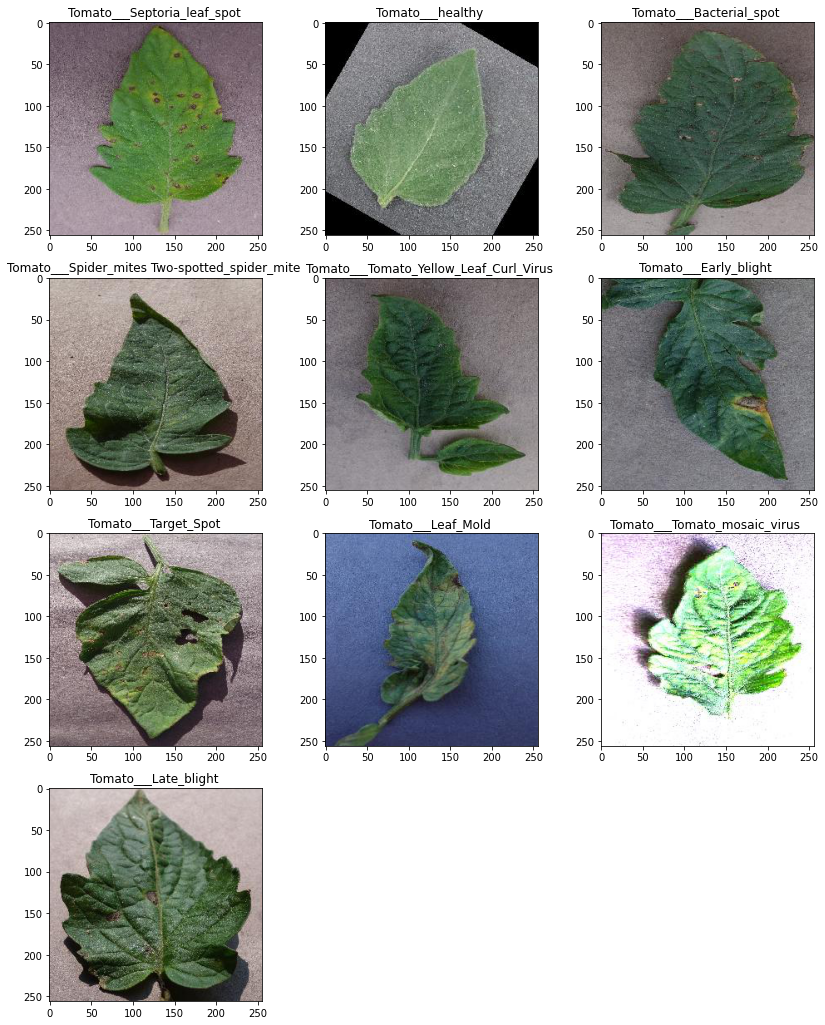

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

classes = os.listdir('./train')

plt.figure(figsize=(14,18))

for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image = Image.open('./train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(4,3,i[0]+1)
    plt.title('{0} '.format(i[1]))
    
    plt.imshow(image)
plt.show()

In [ ]:
IMG_SHAPE = (256,256,3)
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=SIZE )

In [ ]:
base_model.trainable = False

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)
mc = ModelCheckpoint(filepath="mobilenet_model.h5", 
                     monitor= 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only=True)
cb= [es,mc]

In [ ]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history=model.fit(train,
                  validation_data=val,
                  batch_size=32,
                  epochs=10,
                  callbacks = cb
                  )

Epoch 1/10
402/402 [==============================] - ETA: 0s - loss: 0.8058 - accuracy: 0.7352
Epoch 1: val_accuracy improved from -inf to 0.78982, saving model to mobilenet_model.h5
402/402 [==============================] - 92s 213ms/step - loss: 0.8058 - accuracy: 0.7352 - val_loss: 0.5689 - val_accuracy: 0.7898
Epoch 2/10
402/402 [==============================] - ETA: 0s - loss: 0.3612 - accuracy: 0.8775
Epoch 2: val_accuracy improved from 0.78982 to 0.86600, saving model to mobilenet_model.h5
402/402 [==============================] - 81s 202ms/step - loss: 0.3612 - accuracy: 0.8775 - val_loss: 0.4056 - val_accuracy: 0.8660
Epoch 3/10
402/402 [==============================] - ETA: 0s - loss: 0.2615 - accuracy: 0.9095
Epoch 3: val_accuracy did not improve from 0.86600
402/402 [==============================] - 84s 209ms/step - loss: 0.2615 - accuracy: 0.9095 - val_loss: 0.4399 - val_accuracy: 0.8440
Epoch 4/10
402/402 [==============================] - ETA: 0s - loss: 0.2080 - a

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 128)         1474688   
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 3,733,962
Trainable params: 1,475,978
Non-

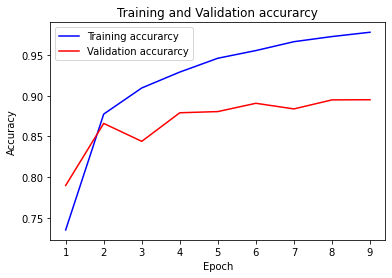

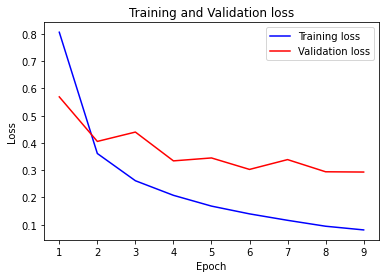

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
print("Calculating model accuracy")
scores = model.evaluate(test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
144/144 [==============================] - 22s 145ms/step - loss: 0.2378 - accuracy: 0.9169
Test Accuracy: 91.69029593467712


In [ ]:
from keras import models
model=models.load_model('/content/drive/MyDrive/New Plant Diseases /mobilenet_model.h5')

In [ ]:
predictions = model.predict_generator(test, steps=len(val), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


172/172 [==============================] - 204s 1s/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_labels = test.classes

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[43 63 47 30 48 40 31 39 41 43]
 [41 49 68 34 47 49 44 47 52 49]
 [44 58 45 38 44 54 52 50 44 34]
 [42 47 46 41 50 49 49 54 46 46]
 [42 38 46 41 39 45 34 50 53 48]
 [40 48 52 38 54 37 46 50 32 38]
 [53 45 49 52 43 31 44 48 40 52]
 [43 53 55 52 43 41 44 52 43 64]
 [43 46 53 41 51 47 44 42 38 43]
 [35 59 40 50 44 41 49 60 48 55]]


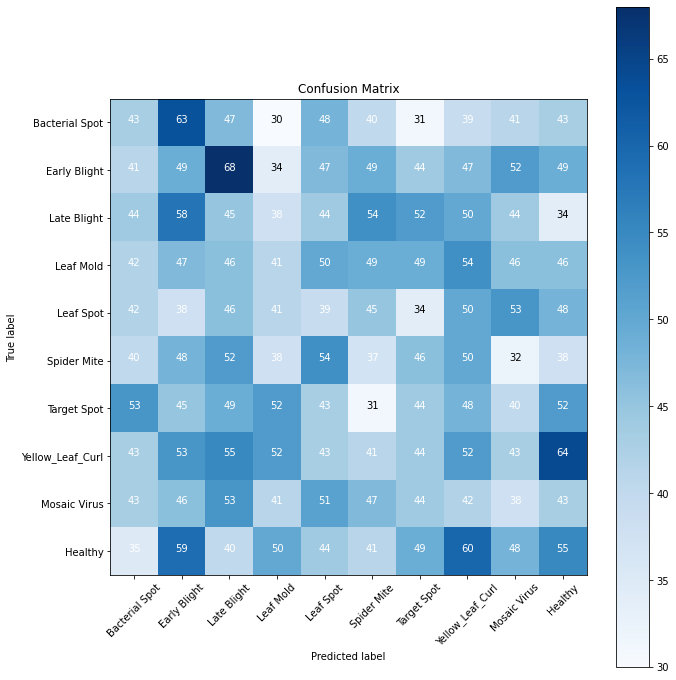

In [ ]:
import itertools
cm_plot_labels =  ['Bacterial Spot', 'Early Blight', 'Late Blight', 'Leaf Mold', 'Leaf Spot', 
               'Spider Mite', 'Target Spot', 'Yellow_Leaf_Curl', 'Mosaic Virus', 'Healthy']
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
y_true = test.classes
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

                  precision    recall  f1-score   support

  Bacterial Spot       0.10      0.10      0.10       425
    Early Blight       0.10      0.10      0.10       480
     Late Blight       0.09      0.10      0.09       463
       Leaf Mold       0.10      0.09      0.09       470
       Leaf Spot       0.08      0.09      0.09       436
     Spider Mite       0.09      0.09      0.09       435
     Target Spot       0.10      0.10      0.10       457
Yellow_Leaf_Curl       0.11      0.11      0.11       490
    Mosaic Virus       0.09      0.08      0.09       448
         Healthy       0.12      0.11      0.12       481

        accuracy                           0.10      4585
       macro avg       0.10      0.10      0.10      4585
    weighted avg       0.10      0.10      0.10      4585



In [ ]:
import os.path
if os.path.isfile('/content/drive/MyDrive/New Plant Diseases /mobilenet_model.h5') is False:
  model.save('/content/drive/MyDrive/New Plant Diseases /mobilenet_model.h5')